[*********************100%***********************]  1 of 1 completed
Epoch 1/50
69/69 [==============================] - 11s 18ms/step - loss: 0.0029
Epoch 2/50
69/69 [==============================] - 1s 18ms/step - loss: 4.8445e-05
Epoch 3/50
69/69 [==============================] - 1s 18ms/step - loss: 4.6664e-05
Epoch 4/50
69/69 [==============================] - 1s 18ms/step - loss: 4.4580e-05
Epoch 5/50
69/69 [==============================] - 1s 18ms/step - loss: 4.2359e-05
Epoch 6/50
69/69 [==============================] - 1s 18ms/step - loss: 4.3310e-05
Epoch 7/50
69/69 [==============================] - 1s 18ms/step - loss: 4.3587e-05
Epoch 8/50
69/69 [==============================] - 1s 15ms/step - loss: 4.4762e-05
Epoch 9/50
69/69 [==============================] - 1s 14ms/step - loss: 4.3560e-05
Epoch 10/50
69/69 [==============================] - 1s 15ms/step - loss: 3.9887e-05
Epoch 11/50
69/69 [==============================] - 1s 17ms/step - loss: 4.2968e-05
Epoch 12

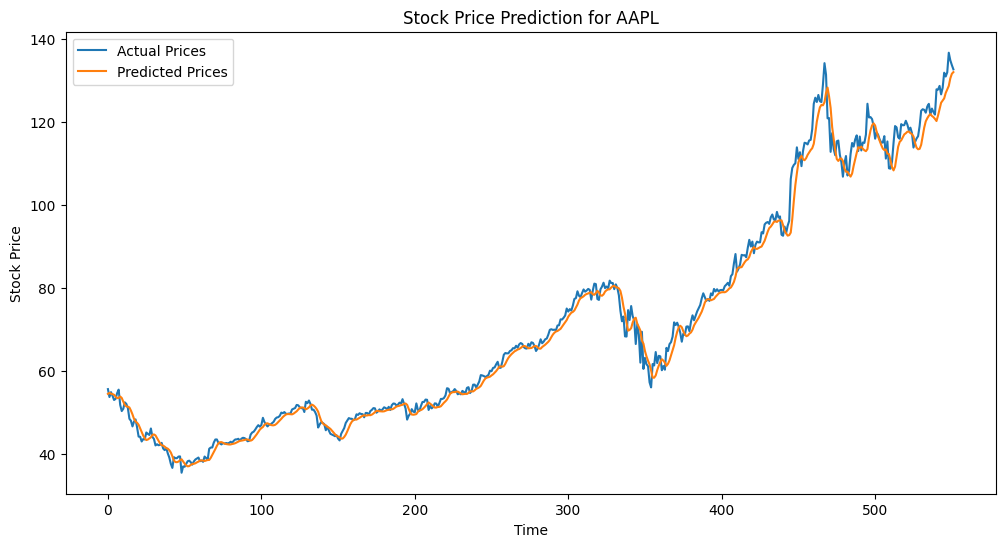

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the stock symbol and time period
stock_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2021-01-01"

# Fetch stock price data using yfinance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract the 'Close' prices
stock_prices = stock_data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
stock_prices_scaled = scaler.fit_transform(stock_prices.reshape(-1, 1))

# Create sequences and labels for the LSTM model
sequence_length = 10  # Number of previous days' prices to consider
X = []
y = []
for i in range(sequence_length, len(stock_prices_scaled)):
    X.append(stock_prices_scaled[i - sequence_length:i, 0])
    y.append(stock_prices_scaled[i, 0])
X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_prices_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(stock_prices[train_size + sequence_length:], label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'Stock Price Prediction for {stock_symbol}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
